In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.config import get_dataset_and_user
from src.user import DummyUser
%matplotlib inline

In [2]:
# get data
X_iris, user_iris = get_dataset_and_user('iris')
y_iris = user_iris.get_label(X_iris, update_counter=False)

X_housing, user_housing = get_dataset_and_user('housing')
y_housing = user_housing.get_label(X_housing, update_counter=False)

X_sdss, user_sdss = get_dataset_and_user('sdss_Q1.1')

/Users/luciano/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/luciano/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


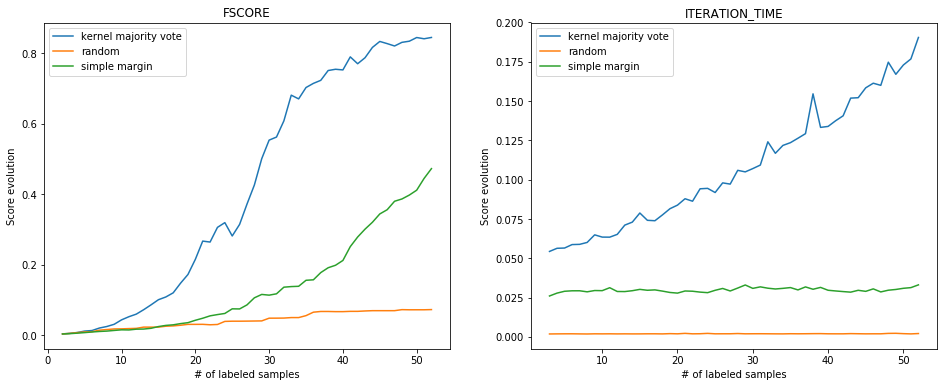

In [11]:
from src.active_learning.svm import SimpleMargin, SolverMethod, OptimalMargin
from src.active_learning.linear import LinearMajorityVote, KernelMajorityVote
from src.active_learning.agnostic import RandomLearner
from src.showdown import Showdown
from src.plotting import plot_showdown
from src.initial_sampling import StratifiedSampler
from sklearn.svm import SVC

user_housing.max_iter = 35
user_iris.max_iter = 10
user_sdss.max_iter = 50

active_learners_list = [
    ("random", RandomLearner(SVC(C=100000, kernel='rbf')), StratifiedSampler(1,1)),
    #("optimal linear", OptimalMargin(C=100000, kind='linear', kernel='linear', chain_length=40, sample_size=16)),
    ("kernel majority vote", KernelMajorityVote(chain_length=25, sample_size=16), StratifiedSampler(1,1)),
    ("simple margin", SimpleMargin(kind='kernel', kernel='rbf', C=100000), StratifiedSampler(1,1)),
    #('cholesky CL=50', OptimalMargin(C=100, kind='kernel', kernel='rbf', chain_length=50, factorization_type='cholesky')),
    #('diag th=0.9 CL=50', OptimalMargin(C=1000, kind='linear', kernel='rbf', chain_length=50, sample_size=8, threshold=0.9, factorization_type='diagonalize'), StratifiedSampler(1,1)),
    #('diag th=0.9 CL=50 SS=8', OptimalMargin(C=100, kind='kernel', kernel='rbf', chain_length=50, sample_size=8, threshold=0.9, factorization_type='diagonalize')),
    #('diag th=0.9 CL=50, SS=16', OptimalMargin(C=100, kind='kernel', kernel='rbf', chain_length=50, sample_size=16, threshold=0.9, factorization_type='diagonalize')),
    #('linear majority', LinearMajorityVote(chain_length=50, sample_size=8), StratifiedSampler(1,1))
]

datasets_list = [
     ('sdss', X_sdss, user_sdss)
    #("housing", X_housing, user_housing),
    #("iris", X_iris, user_iris),
    #('gauss', X_gaussian, user_gaussian)
]

times = 10
showdown = Showdown()
output = showdown.run(datasets_list, active_learners_list, times)

#print(output.head())
plot_showdown(output, times, metrics_list=['fscore', 'iteration_time'])

In [7]:
output['sdss']['fscore']

kernel majority vote                             random            \
                    max      mean       min  std       max      mean   
2              0.003414  0.003414  0.003414  0.0  0.003003  0.003003   
3              0.004841  0.004841  0.004841  0.0  0.006110  0.006110   
4              0.008218  0.008218  0.008218  0.0  0.007473  0.007473   
5              0.007721  0.007721  0.007721  0.0  0.010352  0.010352   
6              0.010057  0.010057  0.010057  0.0  0.010352  0.010352   
7              0.019509  0.019509  0.019509  0.0  0.010351  0.010351   
8              0.031885  0.031885  0.031885  0.0  0.010350  0.010350   
9              0.064990  0.064990  0.064990  0.0  0.011031  0.011031   
10             0.081365  0.081365  0.081365  0.0  0.011031  0.011031   
11             0.097484  0.097484  0.097484  0.0  0.011032  0.011032   
12             0.058573  0.058573  0.058573  0.0  0.011335  0.011335   
13             0.115028  0.115028  0.115028  0.0  0.010691  0.010691   
14             0.165554  0.165554  0.165554  0.0  0.012727  0.012727   
15             0.210526  0.210526  0.210526  0.0  0.012726  0.012726   
16             0.219858  0.219858  0.219858  0.0  0.026661  0.026661   
17             0.274336  0.274336  0.274336  0.0  0.026661  0.026661   
18             0.216000  0.216000  0.216000  0.0  0.026661  0.026661   
19             0.265487  0.265487  0.265487  0.0  0.026661  0.026661   
20             0.317280  0.317280  0.317280  0.0  0.027846  0.027846   
21             0.447059  0.447059  0.447059  0.0  0.027846  0.027846   
22             0.448430  0.448430  0.448430  0.0  0.027840  0.027840   
23             0.542056  0.542056  0.542056  0.0  0.027846  0.027846   
24             0.429319  0.429319  0.429319  0.0  0.027840  0.027840   
25             0.572917  0.572917  0.572917  0.0  0.027846  0.027846   
26             0.453039  0.453039  0.453039  0.0  0.028048  0.028048   
27             0.426966  0.426966  0.426966  0.0  0.028035  0.028035   
28             0.527778  0.527778  0.527778  0.0  0.028048  0.028048   
29             0.583942  0.583942  0.583942  0.0  0.028048  0.028048   
30             0.567376  0.567376  0.567376  0.0  0.028048  0.028048   
31             0.687500  0.687500  0.687500  0.0  0.028042  0.028042   
32             0.727273  0.727273  0.727273  0.0  0.028035  0.028035   
33             0.748201  0.748201  0.748201  0.0  0.028048  0.028048   
34             0.748201  0.748201  0.748201  0.0  0.028048  0.028048   
35             0.748201  0.748201  0.748201  0.0  0.032900  0.032900   
36             0.785714  0.785714  0.785714  0.0  0.032900  0.032900   
37             0.785714  0.785714  0.785714  0.0  0.032900  0.032900   
38             0.820144  0.820144  0.820144  0.0  0.032900  0.032900   
39             0.820144  0.820144  0.820144  0.0  0.032900  0.032900   
40             0.820144  0.820144  0.820144  0.0  0.032900  0.032900   
41             0.820144  0.820144  0.820144  0.0  0.032900  0.032900   
42             0.820144  0.820144  0.820144  0.0  0.032900  0.032900   
43             0.820144  0.820144  0.820144  0.0  0.032199  0.032199   
44             0.820144  0.820144  0.820144  0.0  0.039897  0.039897   
45             0.820144  0.820144  0.820144  0.0  0.039897  0.039897   
46             0.820144  0.820144  0.820144  0.0  0.039859  0.039859   
47             0.820144  0.820144  0.820144  0.0  0.039897  0.039897   
48             0.820144  0.820144  0.820144  0.0  0.039897  0.039897   
49             0.820144  0.820144  0.820144  0.0  0.039897  0.039897   
50             0.820144  0.820144  0.820144  0.0  0.039897  0.039897   
51             0.820144  0.820144  0.820144  0.0  0.039897  0.039897   
52             0.850000  0.850000  0.850000  0.0  0.039897  0.039897   

                  simple margin                           
         min  std           max      mean       min  std  
2   0.003003  0.0      0.003168  0.003168  0.003168  0.0  
3   0.006

In [5]:
from datetime import datetime

def point_parser(s):
    s = s[1:-1]  # remove square brackets
    arrays = s.split('\n')
    arrays_without_brackets = map(lambda x: x.strip()[1:-1], arrays)
    final = list(map(lambda x: [float(y) for y in x.split()], arrays_without_brackets))
    return final[0]

def parse_log(path='task.log'):
    with open(path, 'r') as f:
        for line in f:
            timestamp, _, _, _, iteration, point, label = line.strip().split('\t')
            timestamp = datetime.strptime(timestamp, "%Y-%m-%d %H:%M:%S,%f").timestamp()
            point = point_parser(point)
            label = float(label)
            iteration = int(iteration)
            yield timestamp, iteration, point, label

logs = parse_log()            
t0, i0, x0, l0 = next(logs)
points = []
labels = []
for t, i, x, l in logs:
    points.append(x)
    labels.append(l)
    if i != i0:
        i0 = i
        # compute metrics
        pass

print(points)
print(labels)

[[0.47786315, -0.1081626], [0.18989938, 0.2072225], [0.72676336, -1.022222], [1.23993184, 1.3996669], [0.31764089, -0.6853837], [0.09677994, 0.3631638], [0.16887672, -0.2626306], [1.33433884, 0.82075], [0.64436294, 0.6012916], [0.27953612, 0.3263496], [0.21994941, -1.1471321], [0.05330945, -0.230007], [0.10436175, 0.0372886], [0.0784556, 0.0011605], [1.09134098, -0.5514949], [0.56125349, 0.240516], [0.86383806, -0.4462214], [0.177216, 0.2293219], [0.20323374, 0.1763484], [0.00640923, -0.2215843], [0.21502824, 0.126263], [0.363377, -0.0736071], [0.11199454, -0.2668519], [0.02725349, 0.0024604], [0.22384863, -0.2472965], [0.18566431, 0.096148], [0.00466859, -0.069777], [0.07447028, -0.135915], [0.20706415, -0.1130447], [0.00921824, 0.011849], [0.08289311, -0.0905175], [0.21990609, -0.0558049], [0.20362366, 0.040376], [0.07865239, -0.0635595], [0.15009986, 0.0683432], [0.17977725, -0.0626387], [0.06515038, 0.0581602], [0.1399364, 0.055145], [0.10323021, -0.046474], [0.11088084, -0.0594682